Draft notebook:
## EEG Preprocessing and Visualization

### 1. Data Acquisition
We utilize the **Stockholm SleepyBrain Project (ds000201)** dataset. The objective is to extract raw Polysomnography (PSG) signals for Sleep Spindle analysis.

### 2. Signal Processing Workflow
To isolate Sleep Spindles, the raw signal undergoes the following stages:
* **Band-pass Filtering**: A Butterworth filter is applied between **11-16 Hz** to focus on the spindle frequency band.
* **Resampling/Normalization**: Ensuring the sampling rate is consistent for automated detection.
* **Visualization**: Plotting the time-series data to verify signal integrity and identify oscillatory bursts.

### 3. Objective
By isolating these features, we prepare the data for the **Latent Diffusion Encoding** adaptation to quantify spindle density ($events/min$).

In [ ]:
import mne 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating RawArray with float64 data, n_channels=1, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 11 - 16 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 11.00
- Lower transition bandwidth: 2.75 Hz (-6 dB cutoff frequency: 9.62 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 18.00 Hz)
- Filter length: 121 samples (1.210 s)



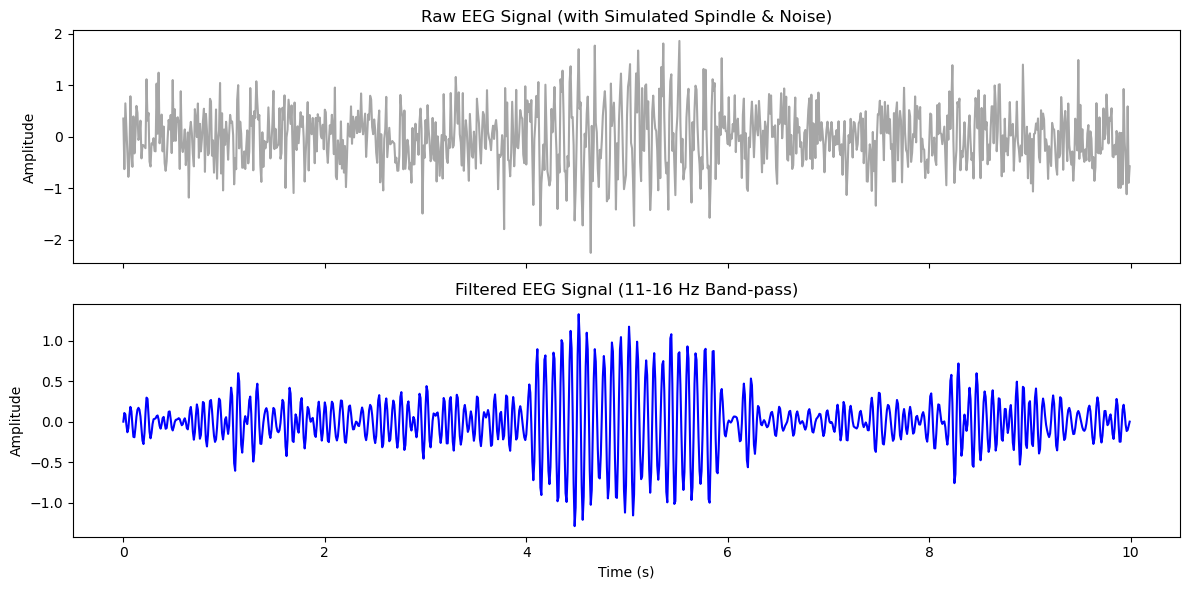

In [ ]:
# 1. Define the fake data to test.
# freq = 100  # Sampling frequency in Hz
t = np.arange(0, 10, 1/sfreq)
# Simulate a 12Hz Sleep Spindle burst added to some noise
spindle_signal = np.sin(2 * np.pi * 12 * t) * (t > 4) * (t < 6) 
noise = np.random.normal(0, 0.5, len(t))
raw_data = spindle_signal + noise

# 2. Convert to MNE Raw Object
info = mne.create_info(ch_names=['EEG Fz'], sfreq=sfreq, ch_types=['eeg'])
raw = mne.io.RawArray(raw_data.reshape(1, -1), info)

# 3. Apply Band-pass Filter (11-16 Hz)
raw_filtered = raw.copy().filter(l_freq=11.0, h_freq=16.0, fir_design='firwin')

# 4. Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax1.plot(t, raw.get_data()[0], color='gray', alpha=0.7)
ax1.set_title("Raw EEG Signal (with Simulated Spindle & Noise)")
ax1.set_ylabel("Amplitude")

ax2.plot(t, raw_filtered.get_data()[0], color='blue')
ax2.set_title("Filtered EEG Signal (11-16 Hz Band-pass)")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

plt.tight_layout()
plt.show()